<a href="https://colab.research.google.com/github/jacquelinevanarkel/CulturalEvolutionCollateralSignals-2021/blob/main/Model_Winter_%26_Wedel_(2016).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Replication of Winter & Wedel (2016) / Wedel (2012)

Because we decided to first replicate the study, everything about the collateral signals is left out (but taken into account for the ease of implementation later on). After the resutls are replicated, we adjust the model to introduce a division between word categories: communicative words and metacommunicative words.   

## General features

- An **agent** consists of a lexicon of $|W|$ word categories (let's start with 4). ~~One word in that set should be singled out as the *continuer* word. In other words, the entire set of word categories $W$ can be further split up into a set of regular "communicative" words $C$ and a set of "metacommunicative" words $M$, where $W = C \cup M$ and $C \cap M = \varnothing$. Let's start with $|M| = 1$. For the word(s) in the set $M$, additional and/or adapted pressures will apply.~~
    - A **word** is represented by a set of exemplars. 
        - An **exemplar** is represented by a vector that designates a point in an *n*-dimensional space. Let's start with 2 dimensions, and let's have them both range arbitrarily from 0 to 100 (with integer values in between). An example of an exemplar would then be $[15, 25]$ (these individual values in the vector, like 15 and 25, are referred to as "segments" by Wedel, 2012).


- **Initialisation of an agent:** <span class="mark">Just a randomly generated seed set of exemplars for each word category?</span>

In [111]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [189]:
class Agent():

  def __init__(self, n_words, n_dimensions, n_exemplars = 100, n_continuers=0, similarity_bias_word=True, similarity_bias_segment=True, noise=True, anti_ambiguity_bias=True):
    
    self.n_words = n_words
    self.n_dimensions = n_dimensions
    self.n_exemplars = n_exemplars
    self.n_continuers = n_continuers
    self.similarity_bias_word = similarity_bias_word
    self.similarity_bias_segment = similarity_bias_segment
    self.noise = noise
    self.anti_ambiguity_bias = anti_ambiguity_bias

    # Generate a lexicon as part of the initialisation
    self.lexicon, self.com_words, self.meta_com_words = self.generate_lexicon()

  # Initialising lexicon
  def generate_lexicon(self):

    # Create a lexicon consisting of n_words words each in turn consisting of n_exemplars exemplars
    lexicon = []
    for w in range(self.n_words):
      word = []
      mean = [random.randrange(10, 91) for i in range(self.n_dimensions)]
      cov = [[10, 0], [0, 10]]
      x, y = np.random.multivariate_normal(mean, cov, self.n_exemplars).T
      word.append(list(map(lambda x, y: [x, y], x, y)))
      
      plt.scatter(x, y)

      # Initialiase all words as 'communicative words' ('C')
      lexicon.append([word[0], "C"])

    # print(lexicon)

    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.show()

    # Split the lexicon into meta communicative words (continuers) and communicative words
    if self.n_continuers:
      if self.n_continuers > self.n_words:
        raise ValueError("The number of continuers must be lower than the number of words.")

      # The continuers are randomly chosen out of the lexicon
      indices_meta = random.sample(range(self.n_words), k=self.n_continuers)
      meta_com_words = []
      for index in indices_meta:
        lexicon[index][1] = "M"
        # Create a separate lexicon with the meta communicative words
        meta_com_words.append(lexicon[index])

      # The words that are not meta communicative words are communicative words
      com_words = [word for word in lexicon if word not in meta_com_words]

      # print("The word categories are split into communicative and metacommunicative words")
      # print("New lexicon:", lexicon)

      # print("Meta:", meta_com_words)
      # print("Com:", com_words)

    # If there are no continuers, the meta communicative words list is empty and all the words in the lexicon are communicative words
    else:
      com_words = lexicon
      meta_com_words = []

    return lexicon, com_words, meta_com_words

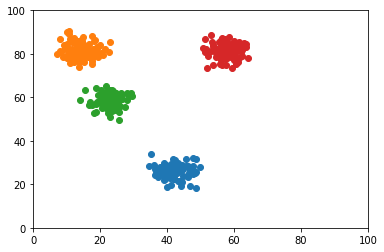

In [227]:
# Test the initialisation
agent_test = Agent(4, 2)

##Production:

Production begins by selecting one exemplar from a word category: An exemplar is chosen from the target word category with probability proportional to the exemplar's activation level. 
- **Activation level:** _"Activation is calculated as an exponential function of recency, where exemplars that were stored 100 rounds previously have an activation level that is approximately .1% that of a new exemplar)."_
  
Before this target is passed to the listener however, two biases are applied to it:"
- **Similarity bias:** Consists of the following two components:
    - **Within-word category similarity bias:** _"The segment exemplar values of this initial word target are stochastically biased toward the value at the same positions in all the word exemplars within the category"_
    - **Within-segment-dimension similarity bias:** _"each individual segment exemplar value in the target is also stochastically biased toward all other segment exemplars that reference the same dimension across the entire lexicon"_ 
- **Random noise:** _"Noise is added to values of the output target by adding a normally distributed random value. This random value is biased slightly toward the center of the dimension, (i.e. a scale value of 50), in a simple model of production-based lenition (Pierrehumbert 2001; see also e.g. Lindblom et al. 1984 for arguments that the packing of phoneme inventories is in part a consequence of effort-minimization processes). The results described below do not depend on this lenition bias, but they contribute to the illustration by imposing a tendency for each segment exemplar distribution to drift toward the center of each dimension which encourages category merger (see discussion below)."_ 
        

In [ ]:
class Production(Agent):

  def __init__(self, similarity_bias_word, similarity_bias_segment, noise):
        super().__init__(similarity_bias_word, similarity_bias_segment, noise)

  def select_exemplar(self):

    return self.add_biases(exemplar)

  def add_biases(self):
    
    if self.similarity_bias_word:
      exemplar = self.similarity_bias_word()

    if self.similarity_bias_segment:
      exemplar = self.similarity_bias_segment()

    if self.noise:
      exemplar = self.noise()

    return exemplar

  def similarity_bias_word(self):

    return exemplar

  def similarity_bias_segment(self):

    return exemplar

  def noise(self):

    return exemplar

##Perception:
        
_"begins the categorization process by calculating the similarity of the speaker output to each category’s stored word exemplars given their activations, in a variant of the Generalized Context Model (Nosofsky 1988). The overall similarities of the speaker output to each category are interpreted as a relative goodness of fit, and the speaker output is then stored as a new exemplar in the best fitting category."_

- **Anti-ambiguity bias:** From Winter & Wedel (2016): _"A final feature of the model is a bias against confusability of word perception, that is, an anti-ambiguity bias. The bias is implemented as follows: the probability of successful identification of an output with a word category is proportional to the degree to which the output uniquely maps to that category and to no other. In this way, distinctive speaker outputs are more likely to be stored than ambiguous outputs, with the result that distinctive phonetic values contribute more to the continuing evolution of the lexicon, both at the word and sound levels."_

In [ ]:
class Perception(Agent):

  def __init__(self, anti_ambiguity_bias, signal):
      super().__init__(anti_ambiguity_bias)
      self.signal = signal

  def similarity(self):

    return similarities

  def anti_ambiguity_bias(self, similarities):

    return probability_storage

  def store_signal(self, probability_storage):

    return lexicon